Nama : Raffi Argianda<br>
Nim : 221351112<br>
Kelas : Malam B

# import library

In [1]:
# import library yang dibutuhkan di sini
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.cluster import DBSCAN

# load dataset

In [2]:
# load dataset mall-customers-data
data = pd.read_csv('mall-customers-data.csv')
data.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# data preprocessing

In [3]:
# Pilih fitur age, annual_income, spending_score untuk clustering
# setelah pilih fitur lahukan standarisasi data sebagai inputan cluster

features = ['age', 'annual_income', 'spending_score']

In [4]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])

In [5]:
inertia = []
k_values = range(1,11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

c:\Users\rapsa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\rapsa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\rapsa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\rapsa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

# K-means Clustering

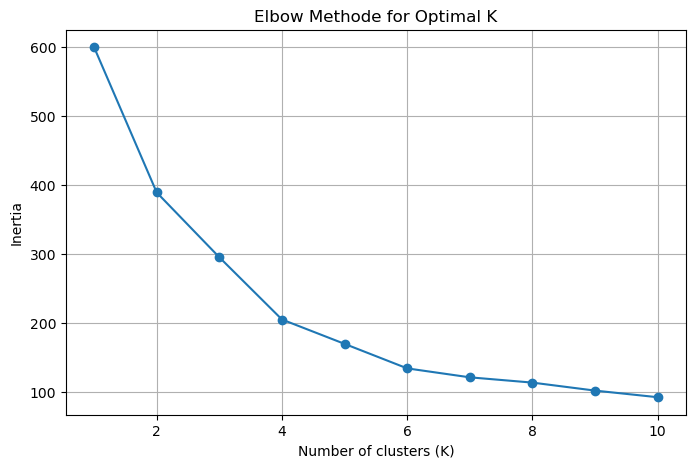

In [6]:
# buatkan plot elbow dan temukan cluster optimal
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker = 'o')
plt.title('Elbow Methode for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [7]:
# buatkan model k-means sesuai jumlah cluster optimal
optimal_k = 4 # Berdasarkan elbow method (misalnya)
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Kmeans'] = kmeans.fit_predict(scaled_features)
data.head()

c:\Users\rapsa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,customer_id,gender,age,annual_income,spending_score,Kmeans
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


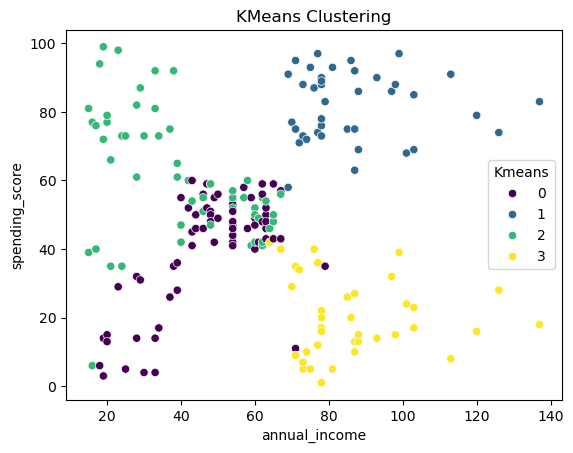

In [8]:
# buatkan profiling menggunakan scater plot dan berikan penjelasannya
plt.figure()
sns.scatterplot(data = data, x = 'annual_income', y = 'spending_score', hue='Kmeans', palette='viridis')
plt.title('KMeans Clustering')
plt.show()

- cluster 0 adalah orang yang memiliki annual income 20 - 40 dengan spending score 0 - 40 dan annual income 40 - 60 dengan spending score 40 - 60 mendandakan ini bertipe moderat
- cluster 1 adalah orang yang memiliki annual income 60 - 100 dengan spending score 60 - 100 menandakan ini bertipe spending score dengan anual income yang sepadan
- cluster 2 adalah orang yang memiliki annual income 40 - 60 dengan spending score 40 - 60 , dan annual income 20 - 40 dengan spending scroe 60 - 100 menandakan gaji rendah tapi sering berbelanja
- cluster 3 adalah orang yang memiliki annual income 60 - 100 dengan spending 0 - 40 menandakan cluster ini lebih save money dengan gaji diatas rata rata

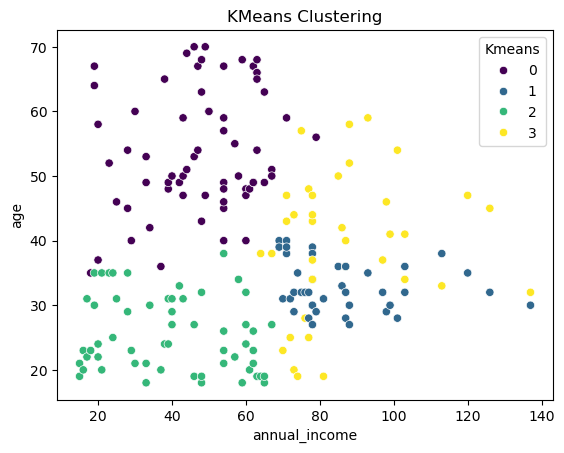

In [9]:
plt.figure()
sns.scatterplot(data = data, x = 'annual_income', y = 'age', hue='Kmeans', palette='viridis')
plt.title('KMeans Clustering')
plt.show()

- cluster 0 adalah orang yang memiliki annual income 20 - 60 dengan umur 35 - 75 pada rentang ini menandakan bahwa gaji dibawah minimum memiliki umur antara 35- 75 tahun
- cluster 1 adalah orang yang memiliki annual income 65 - 140 dengan umur 28 - 40 memiliki gaji diatas rata rata
- cluster 2 adalah orang yang memiliki annual income 20 - 60 dengan umur 18 - 35 memiliki gaji dibawah rata rata
- cluster 3 adalah orang yang memiliki annual income 65 140 dengan umur rata rata 19 - 60 memiliki gaji diatas rata rata

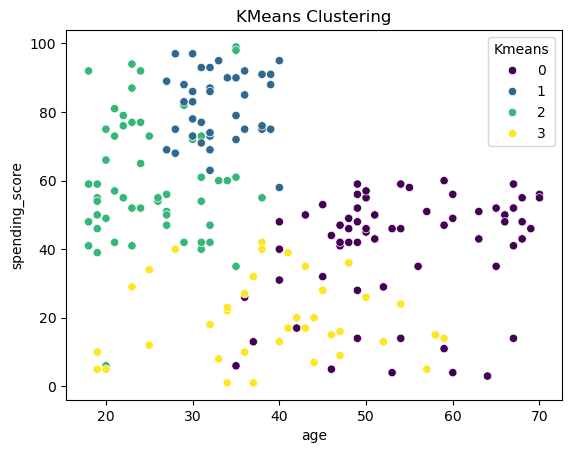

In [10]:
plt.figure()
sns.scatterplot(data = data, x = 'age', y = 'spending_score', hue='Kmeans', palette='viridis')
plt.title('KMeans Clustering')
plt.show()

- cluster 0 adalah orang yang memiliki umur 40 - 70 dengan spending score 30 - 60 orang ini bertipe menengah
- cluster 1 adalah orang yang memiliki umur 25 - 40 dengan spending score 60 - 100 orang ini bertipe tinggi dalam berbelanja
- cluster 2 adalah orang yang memiliki umur 20 - 35 dengan spending score 40 - 80 orang ini bertipe menengah ke tinggi dalam berbelanja
- cluster 3 adalah orang yang memiliki umur 35 - 60 dengan spending score 5 - 40 orang ini bertipe menengah ke bawah dalam berbelanja

# Hierarchical Clustering

In [11]:
linked = linkage(scaled_features, method='ward')

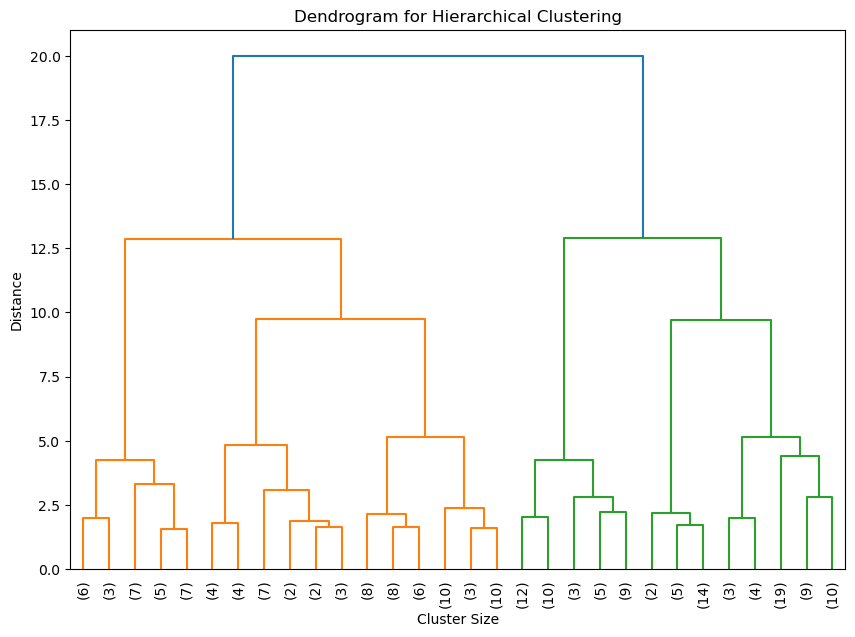

In [12]:
# buatkan plot dendogram dan temukan cluster optimal
plt.figure(figsize=(10,7))
plt.title('Dendrogram for Hierarchical Clustering')
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90, leaf_font_size=10)
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

In [13]:
# buatkan model Hierarchical CLustering sesuai jumlah cluster optimal
cluster_labels = cut_tree(linked, n_clusters=3).reshape(-1, )
data['HC'] = cluster_labels
data.head()

,customer_id,gender,age,annual_income,spending_score,Kmeans,HC
0,1,Male,19,15,39,2,0
1,2,Male,21,15,81,2,1
2,3,Female,20,16,6,2,0
3,4,Female,23,16,77,2,1
4,5,Female,31,17,40,2,0


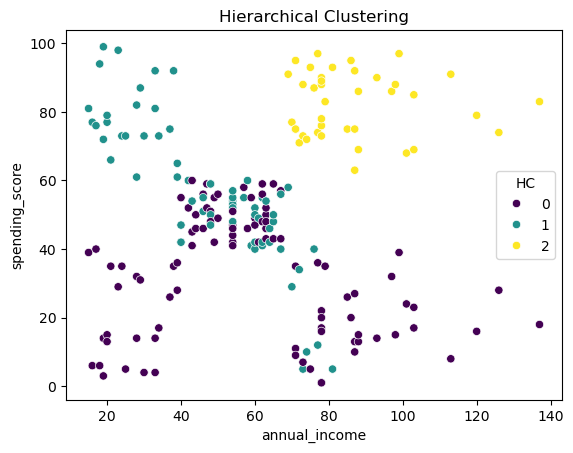

In [14]:
# buatkan profiling menggunakan scater plot dan berikan penjelasannya
plt.figure()
sns.scatterplot(data = data,
                x = 'annual_income',
                y = 'spending_score',
                hue = 'HC',
                palette='viridis')
plt.title('Hierarchical Clustering')
plt.show()

- cluster 0 adalah orang yang memiliki annual income 20 - 40 dengann spending score 0 - 20 (menengah kebawah), annual income 70 - 140 dengann spending score 0 - 40 (lgaji lebih besar namun tidak banyak berbelanja), annual income 40 - 80 dengann spending score 40 - 60 (memiliki gaji standar dengan spending score yang menengah)
- cluster 1 adalah orang yang memiliki annual income 60 - 80 dengann spending score 0 - 40 (gaji standar dan spending score menengah), annual income 20 - 70 dengann spending score 40 - 60 (gaji standard namun spending score menengah), annual income 20 - 40 dengann spending score 60 - 100 (memiliki gaji dibawah rata rata dengan spending score yang tinggi)
- cluster 2 adalah orang yang memiliki annual income 70 - 140 dengan spending score 60 - 100 (gaji tinggi namun spending score juga tinggi)

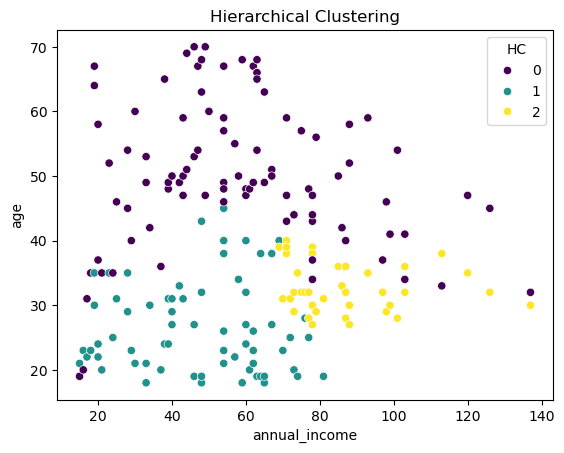

In [15]:
plt.figure()
sns.scatterplot(data = data,
                x = 'annual_income',
                y = 'age',
                hue = 'HC',
                palette='viridis')
plt.title('Hierarchical Clustering')
plt.show()

- cluster 0 adalah orang yang memiliki annual income 20 - 100 dengan umur 35 - 70 (gaji menengah hingga tinggi memiliki umur 35 - 70 tahun)
- cluster 1 adalah orang yang memiliki annual income 19 - 65 dengan umur 19 - 40 (gaji bawah hingga menengah memilki umur 19 - 40 tahun)
- cluster 2 adalah orang yang memiliki annual income 70 - 140 dengan umut 25 - 45 (gaji tinggi memiliku umur 25 - 45)

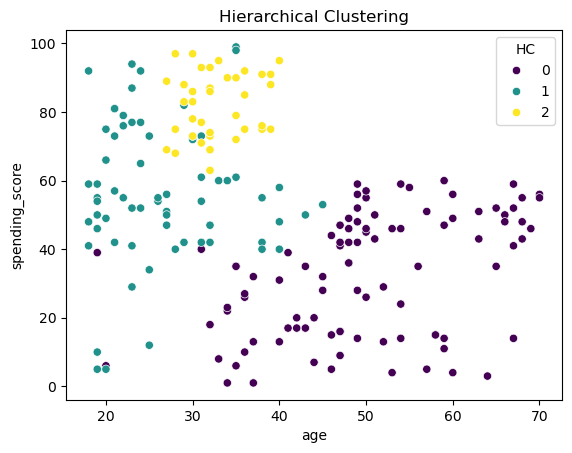

In [16]:
plt.figure()
sns.scatterplot(data = data,
                x = 'age',
                y = 'spending_score',
                hue = 'HC',
                palette='viridis')
plt.title('Hierarchical Clustering')
plt.show()

- cluster 0 adalah orang yang memiliki umur 35 - 70 dengan spending score 10 - 60 (umur muda hingga tua memiliki spending score yang menengah)
- cluster 1 adalah orang yang memiliki umur 20 - 45 dengan spending score 10 - 100 (umur muda memiliki spending score menengah ke tinggi)
- cluster 2 adalah orang yang memiliki umur 25 - 40 dengan spending score 60 - 100 (umur muda memiliki spending score tinggi)

# DBSCAN

In [17]:
# buatkan model DBSCAN dengan nilai eps=0.5 dan min_samples=6
dbscan = DBSCAN(eps=0.5, min_samples=6)
data['dbscan'] = dbscan.fit_predict(scaled_features)
data.head()

,customer_id,gender,age,annual_income,spending_score,Kmeans,HC,dbscan
0,1,Male,19,15,39,2,0,-1
1,2,Male,21,15,81,2,1,0
2,3,Female,20,16,6,2,0,-1
3,4,Female,23,16,77,2,1,0
4,5,Female,31,17,40,2,0,-1


In [18]:
# buatkan kolom untuk memisahkan data anomaly atau bukan anomaly dan buatkan plotnya
data['anomaly'] = data['dbscan'] == -1
data.head()

,customer_id,gender,age,annual_income,spending_score,Kmeans,HC,dbscan,anomaly
0,1,Male,19,15,39,2,0,-1,True
1,2,Male,21,15,81,2,1,0,False
2,3,Female,20,16,6,2,0,-1,True
3,4,Female,23,16,77,2,1,0,False
4,5,Female,31,17,40,2,0,-1,True


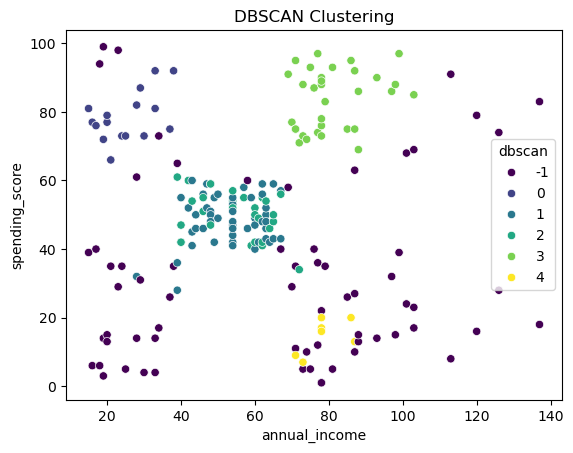

In [19]:
# buatkan profiling menggunakan scater plot dan berikan penjelasannya
plt.figure()
sns.scatterplot(data = data,
                x = 'annual_income',
                y = 'spending_score',
                hue = 'dbscan',
                palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()

- cluster -1 adalah orang yang memiliki annual income 10 - 40 dan 70 - 110 memiliki spending score 10 - 40 (gaji rendah hingga menengah memiliki spending score yang rendah)
- cluster 0 adalah orang yang memiliki annual income 10 - 40 memiliki spending score 60 - 70 (gaji rendah memiliki spending score yang tinggi)
- cluster 1 adalah orang yang memiliki annual income 40 - 70 memiliki spending score 40 - 60 (gaji menengah memiliki spending score yang menengah)
- cluster 2 adalah orang yang memiliki annual income 40 - 70 memiliki spending score 40 - 60 (gaji menengah memiliki spending score yang menengah) 
- cluster 3 adalah orang yang memiliki annual income 70 - 100 memiliki spending score 60 - 100 (gaji menengah memiliki spending score yang tinggi) 
- cluster 4 adalah orang yang memiliki annual income 70 - 80 memiliki spending score 10 - 40 (gaji menengah memiliki spending score yang rendah)

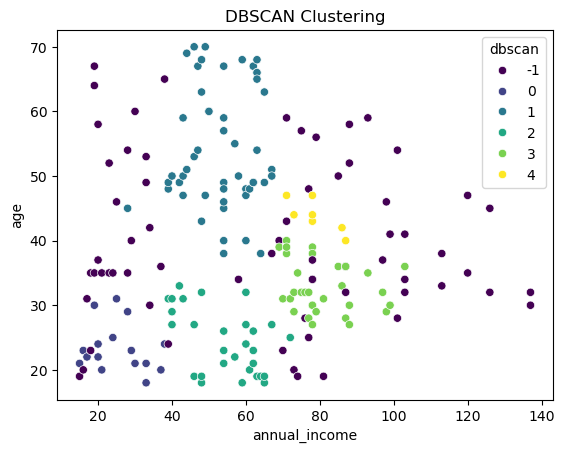

In [20]:
plt.figure()
sns.scatterplot(data = data,
                x = 'annual_income',
                y = 'age',
                hue = 'dbscan',
                palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()

- cluster -1 adalah orang yang memiliki annual income 10 - 40 dan 70 140 memilki umuer 20 - 65 (gaji rendah hingga tinggi memiliki umur 20 - 65)
- cluster 0 adalah orang yang memiliki annual income 10 - 40 memilki umue 29 - 30 (gaji rendah memilki umur 29 - 30 tahun)
- cluster 1 adalah orang yang memiliki annual income 40 - 60 memilki umur 40 -70 (gaji menengah memiliki umur 40 - 70 tahun)
- cluster 2 adalah orang yang memiliki annual income 40 - 65 memilki umur 20 - 40 (gaji menengah memilki umur 20 - 40 tahun)
- cluster 3 adalah orang yang memiliki annual income 70 - 100 memilki umur 25 - 40 (gaji menengah ke tinggi memilki umur 25 - 40 tahun)
- cluster 4 adalah orang yang memiliki annual income 80 - 100 memiliki umur 35 - 45 (gaji tinggi memilki umur35 - 45 tahun)

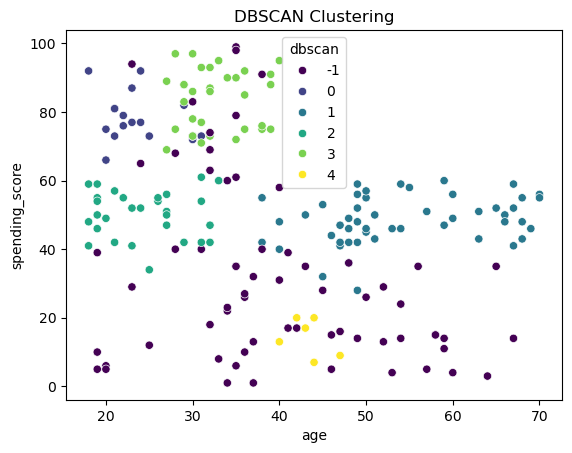

In [21]:
plt.figure()
sns.scatterplot(data = data,
                x = 'age',
                y = 'spending_score',
                hue = 'dbscan',
                palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()

- cluster -1 adalah orang yang memiliki umur tersebar dengan rentang 20 - 65 memilki spending score 10 - 100 (umur muda - tua memiliki spending score rendah sampai tinggi)
- cluster 0 adalah orang yang memiliki umur 20 - 30 memiliki spending score 60 - 100 (umur muda memiliki pengeluaran yang tinggi) 
- cluster 1 adalah orang yang memiliki umur 40 - 70 memiliki spending score 40 - 60 (umur menengah memiliki pengeluaran yang menengah)
- cluster 2 adalah orang yang memiliki umur 20 - 35 memiliki spending score 40 - 60 (umur muda memilki pengeluaran yang menengah)
- cluster 3 adalah orang yang memiliki umur 25 - 40 memiliki spending score 60 - 100 (umur muda memiiki pengeluaran yang tinggi)
- cluster 4 adalah orang yang memiliki umur 40 - 45 memiliki spending score 10 - 25 (umur menengah memiliki pengeluran yang rendah)

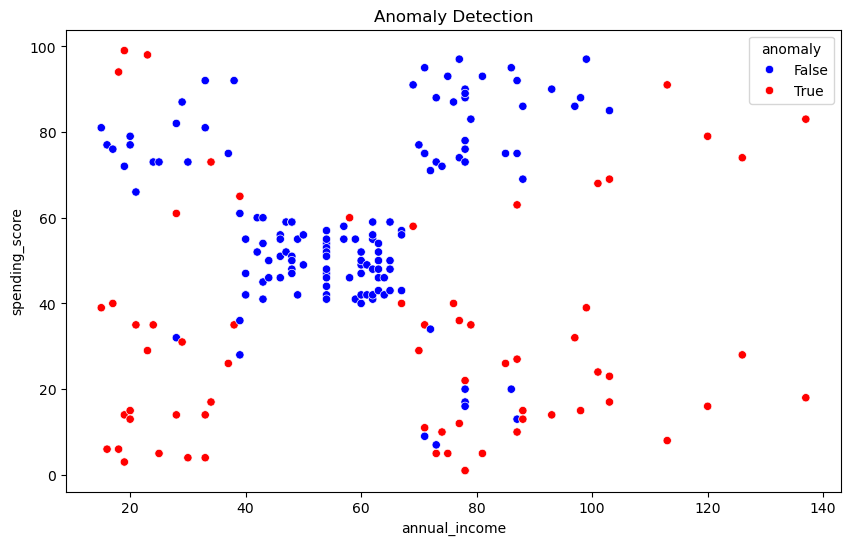

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = data, x = 'annual_income', y = 'spending_score', hue = 'anomaly', palette=['blue', 'red'])
plt.title('Anomaly Detection')
plt.show()

- Data dengan skor pengeluaran tinggi dan penghasilan rendah cenderung teridentifikasi sebagai anomali.
- Data dengan skor pengeluaran rendah dan penghasilan tinggi cenderung teridentifikasi sebagai anomali.
- Data dengan skor pengeluaran dan penghasilan yang berada di kisaran tengah cenderung teridentifikasi sebagai data normal.